<a href="https://colab.research.google.com/github/aihtn2708/DA-Life-Cycle/blob/main/DA_Life_Cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Data Discovery**

Objective: Understand the dataset, its structure, and its contents.

In [123]:
import pandas as pd

# Load the dataset
file_path = 'Superstore.csv'
superstore = pd.read_csv(file_path, encoding='latin1')

# Display basic information about the dataset
superstore.info()

# Display the first few rows of the dataset
superstore.head()

# Summary statistics
summary_stats = superstore.describe()

# Check for missing values
missing_values = superstore.isnull().sum()

summary_stats, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

(            Row ID   Postal Code         Sales     Quantity     Discount  \
 count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
 mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
 std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
 min       1.000000   1040.000000      0.444000     1.000000     0.000000   
 25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
 50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
 75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
 max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   
 
             Profit  
 count  9994.000000  
 mean     28.656896  
 std     234.260108  
 min   -6599.978000  
 25%       1.728750  
 50%       8.666500  
 75%      29.364000  
 max    8399.976000  ,
 Row ID           0
 Order ID         0
 Order Date       0
 Ship Date        0
 Ship Mode        0
 Custo

#**2. Data Preparation**

Objective: Clean the data and prepare it for analysis.

In [151]:
# Data Cleaning

# Converting date columns to datetime format
superstore_clean = superstore.copy()
superstore_clean['Order Date'] = pd.to_datetime(superstore_clean['Order Date'])
superstore_clean['Ship Date'] = pd.to_datetime(superstore_clean['Ship Date'])

# Verify changes
superstore_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# **3. Model Planning**

Objective: Plan the analysis and the model to be used.

For our analysis, we plan to explore the relationship between different variables, such as sales and profit, and other factors to understand performance.

Workflow
- Descriptive Analytics: Calculate summary statistics and visualize the distributions.
- Exploratory Data Analysis (EDA): Visualize the relationships between variables.

###Descriptive Analytics

In [152]:
# Summary statistics for numerical features
summary_stats = superstore_clean.describe()

# Display the summary statistics
summary_stats


,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


### Exploratory Data Analysis (EDA)

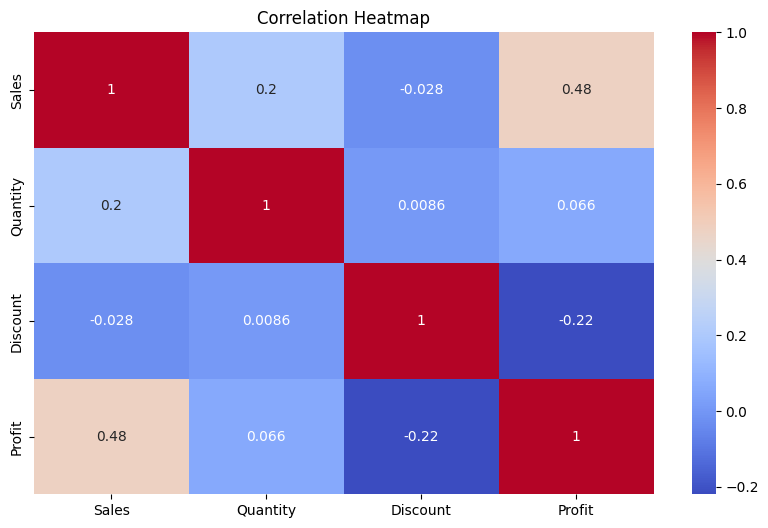

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numeric columns for correlation
numeric_cols = superstore_clean.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop(['Row ID','Postal Code'])

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(superstore_clean[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


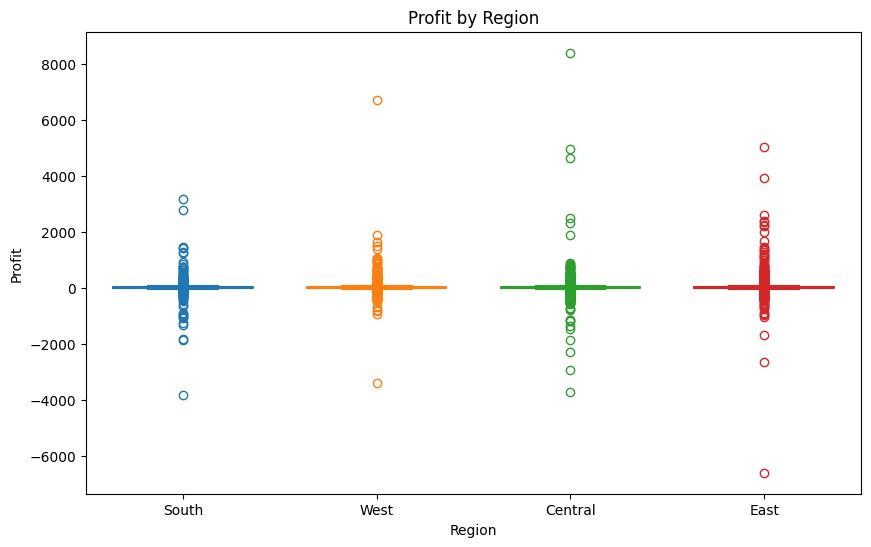

In [154]:
# Visualize profit by different regions
plt.figure(figsize=(10, 6))

# Boxplot to show distribution of profit by region
sns.boxplot(x=superstore_clean['Region'], y=superstore_clean['Profit'], hue = superstore_clean['Region'], fill=False, gap=.1)
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

In [158]:
# Attempt to load the CSV file again with a different encoding
data = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows of the dataset to understand its structure
data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


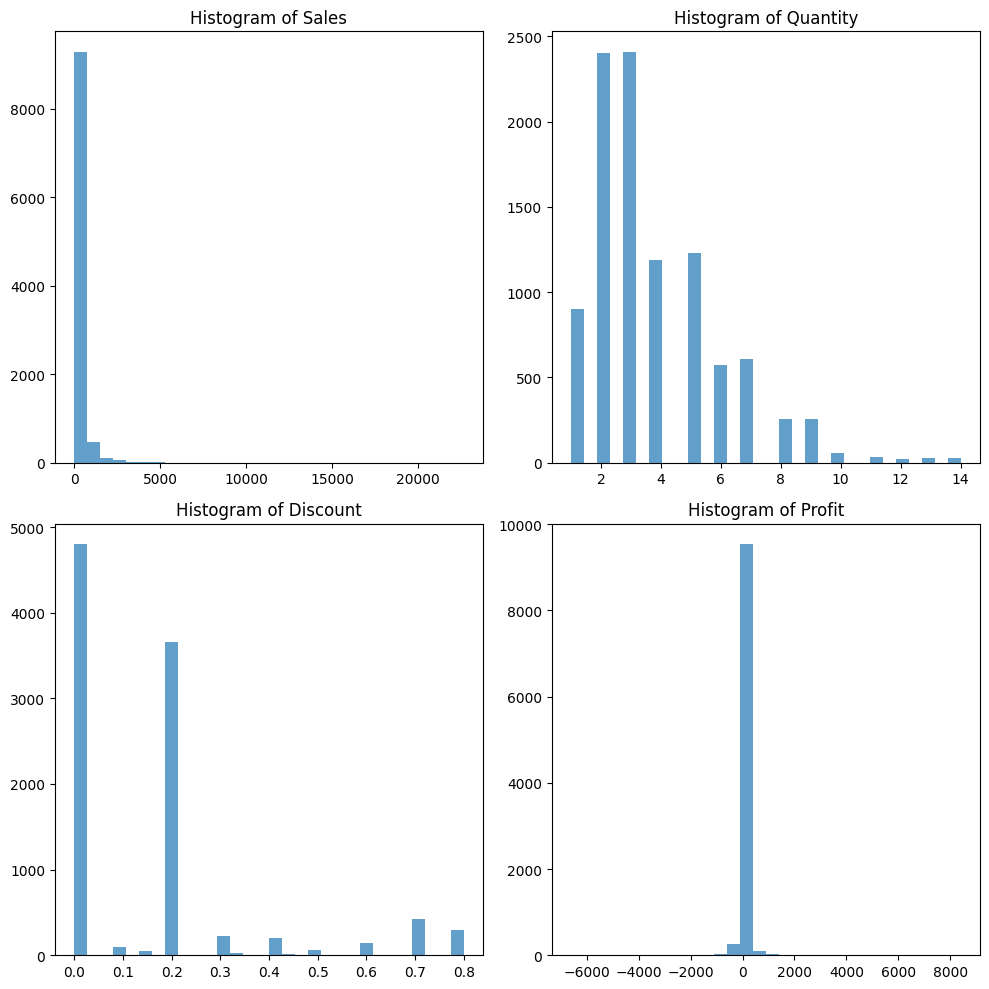

In [62]:
import matplotlib.pyplot as plt

# Plotting histograms and box plots for numerical columns
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit']

# Histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    axes[i].hist(superstore_clean[col].dropna(), bins=30, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

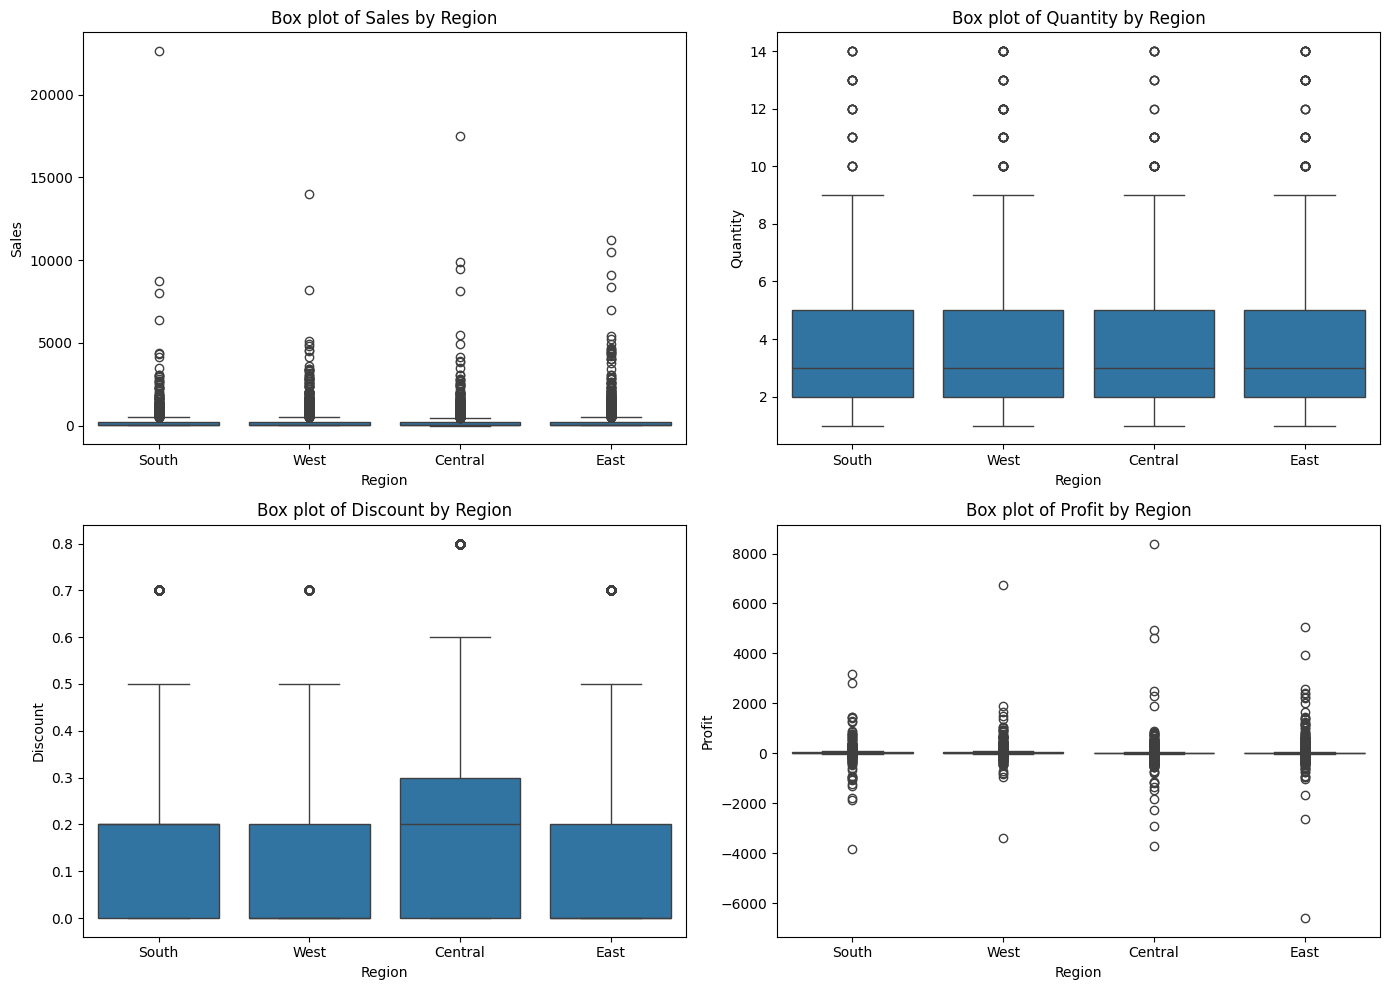

In [80]:
# Create box plots for numerical columns by regions
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(x='Region', y=col, data=data, ax=axes[i])
    axes[i].set_title(f'Box plot of {col} by Region')
    axes[i].set_xlabel('Region')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

In [64]:
# Define a function to plot the sum of Sales and Profit by categorical columns
def plot_sum_by_category(data, category_column, numerical_column, ax):
    sum_data = data.groupby(category_column)[numerical_column].sum().sort_values(ascending=False)
    sum_data.plot(kind='bar', ax=ax, alpha=0.7)
    ax.set_title(f'Sum of {numerical_column} by {category_column}')
    ax.set_ylabel(f'Sum of {numerical_column}')

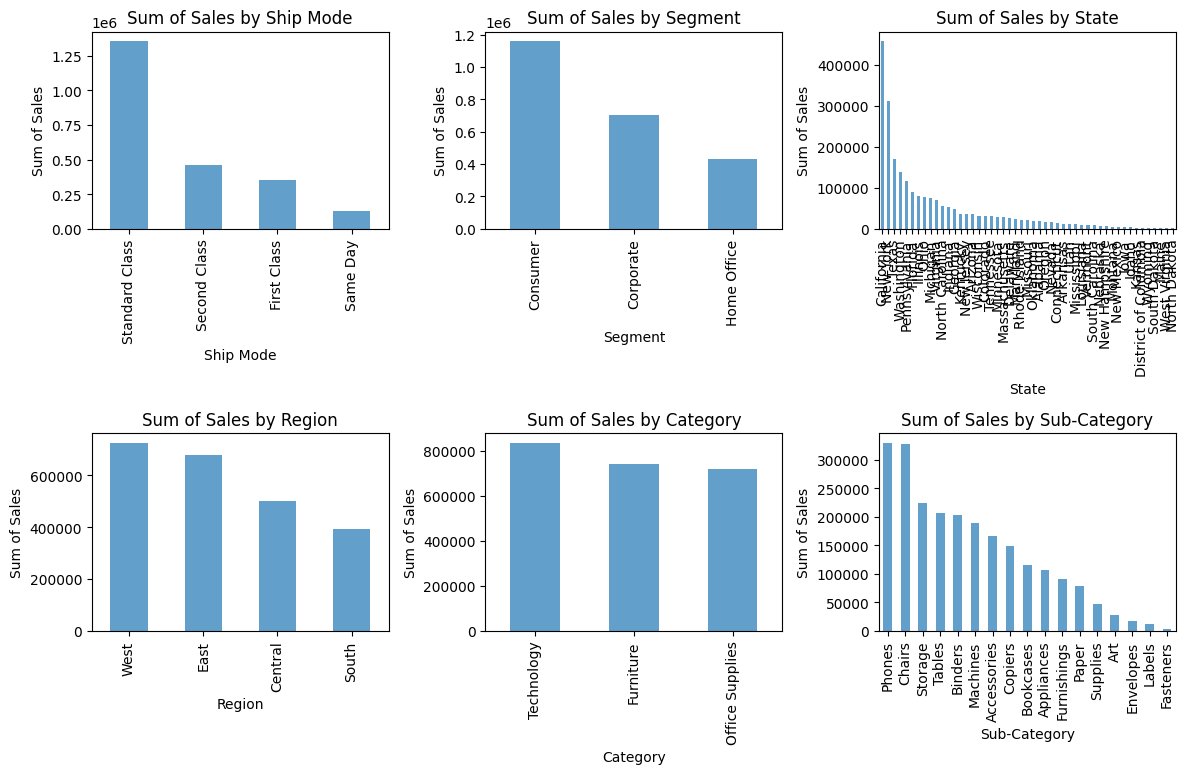

In [65]:
# Define the categorical columns to plot
few_categorical_columns = ['Ship Mode', 'Segment', 'State', 'Region', 'Category', 'Sub-Category']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

# Plot sum of Sales by categorical columns
for i, col in enumerate(few_categorical_columns):
    plot_sum_by_category(data, col, 'Sales', axes[i])

plt.tight_layout()
plt.show()


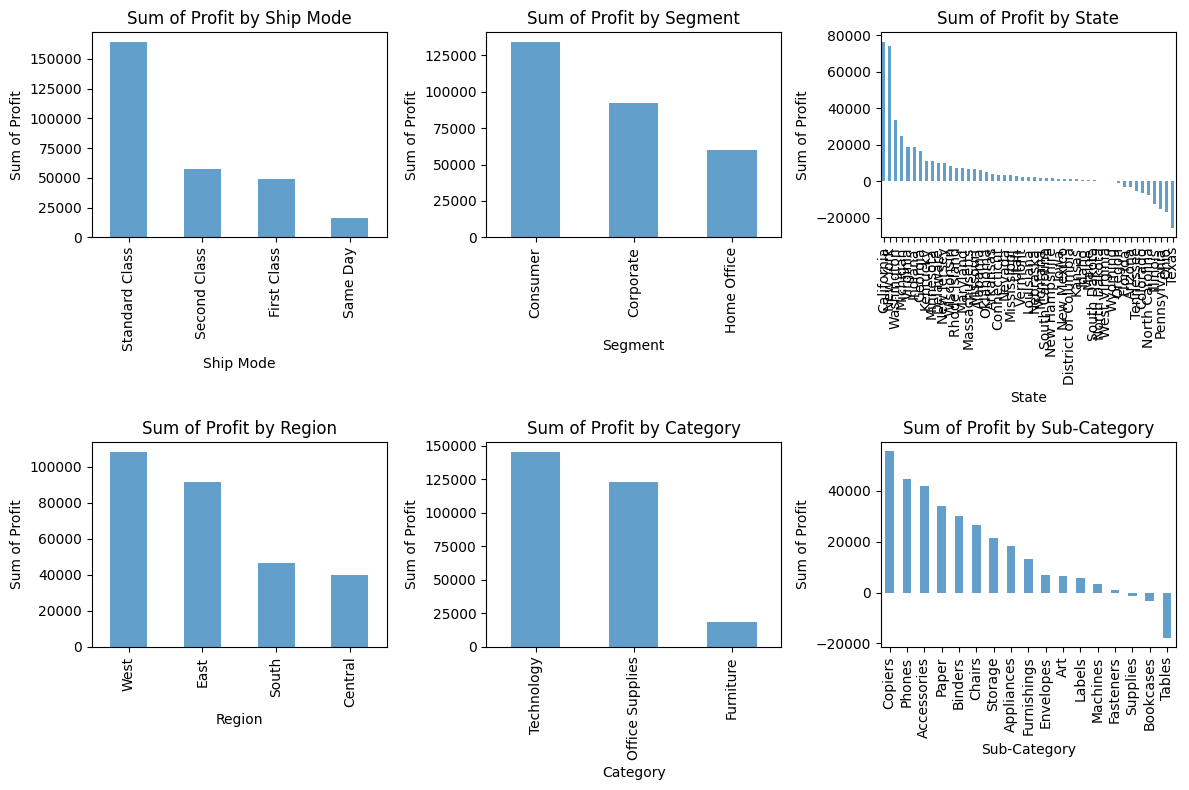

In [66]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

# Plot sum of Profit by categorical columns
for i, col in enumerate(few_categorical_columns):
    plot_sum_by_category(data, col, 'Profit', axes[i])

plt.tight_layout()
plt.show()


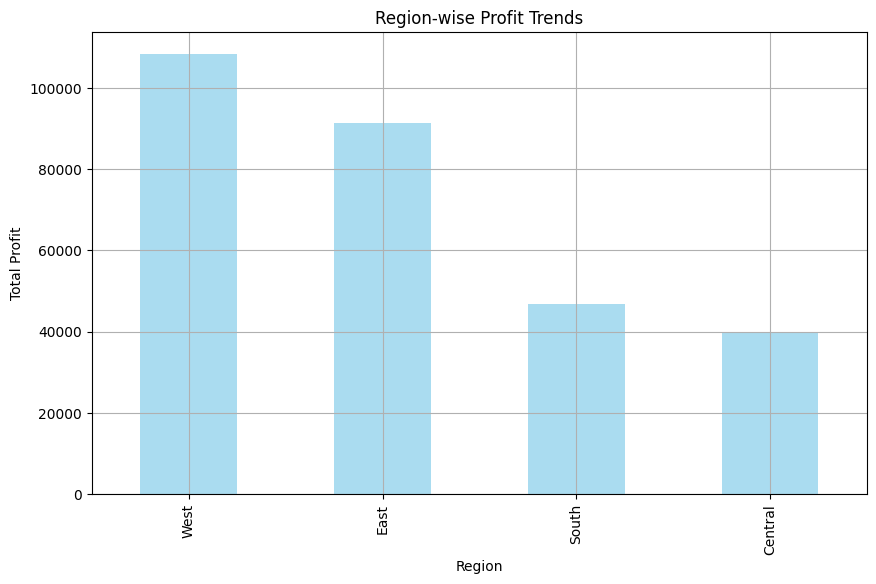

In [67]:
region_profit = data.groupby('Region')['Profit'].sum().sort_values(ascending=False)

# Plotting region-wise profit trends
plt.figure(figsize=(10, 6))
region_profit.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Region-wise Profit Trends')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()


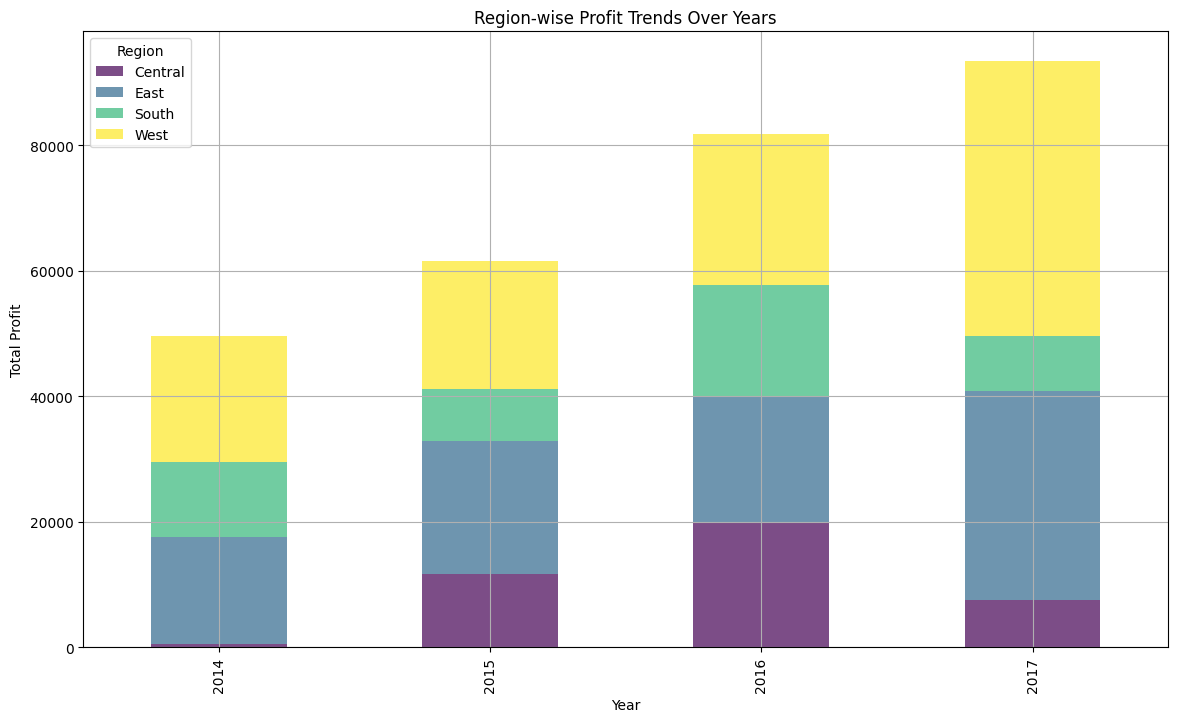

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# First, ensure the 'Order Date' column is in datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract the year from the 'Order Date' column
data['Order Year'] = data['Order Date'].dt.year

# Calculate the sum of profit for each region per year
region_year_profit = data.groupby(['Region', 'Order Year'])['Profit'].sum().unstack().fillna(0)

# Plotting region-wise profit trends over the years
region_year_profit.T.plot(kind='bar', figsize=(14, 8), stacked=True, colormap='viridis', alpha=0.7)
plt.title('Region-wise Profit Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.legend(title='Region')
plt.grid(True)
plt.show()

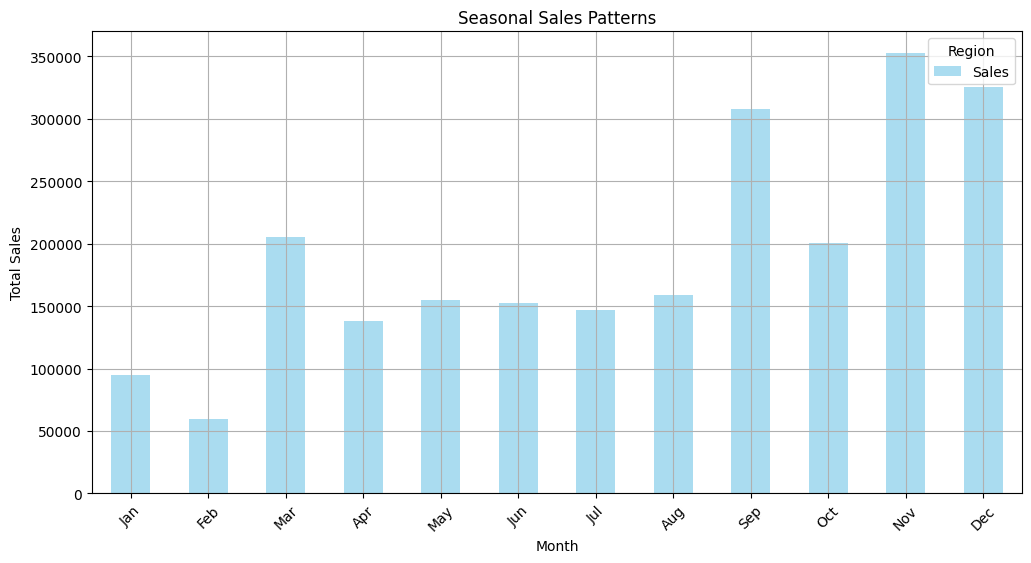

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the month from the 'Order Date' column
data['Order Month'] = data['Order Date'].dt.month

# Calculate the sum of sales for each month
monthly_sales = data.groupby(['Order Month'])['Sales'].sum()

# Plotting monthly sales patterns
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Seasonal Sales Patterns')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Region')
plt.grid(True)
plt.show()

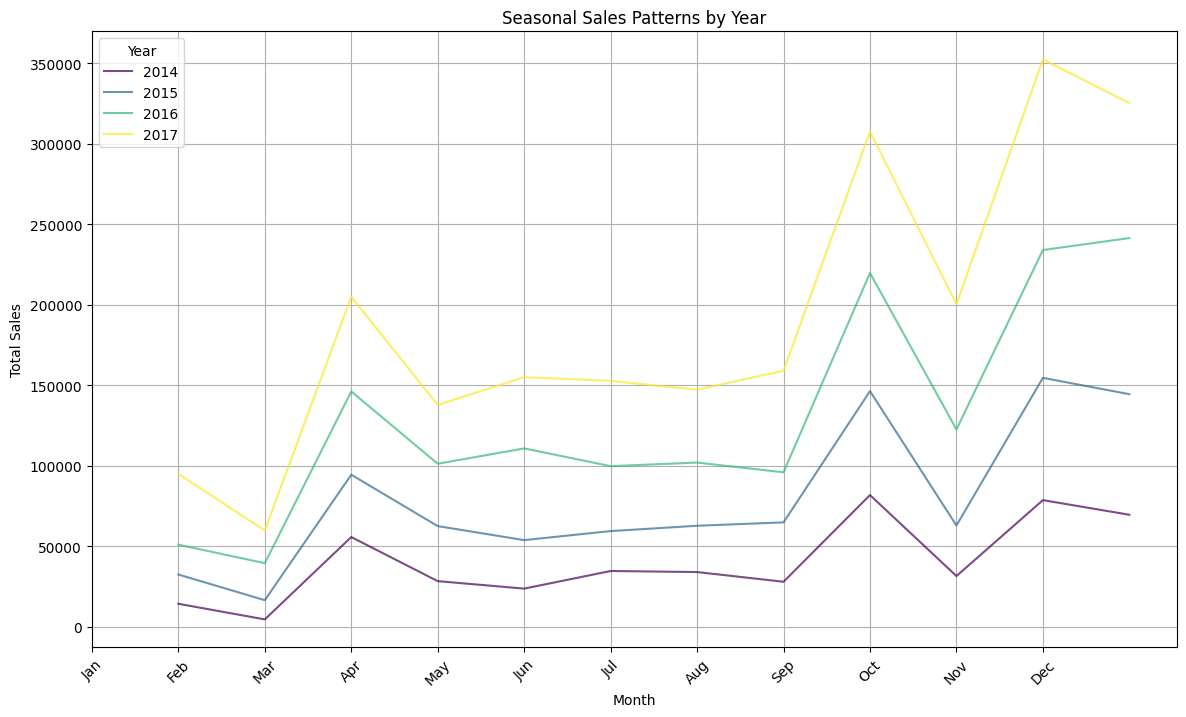

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into the 'data' DataFrame
# Example: data = pd.read_csv('your_dataset.csv')

# Ensure the 'Order Date' column is in datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract the month and year from the 'Order Date' column
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

# Calculate the sum of sales for each month by year
monthly_sales_by_year = data.groupby(['Order Year', 'Order Month'])['Sales'].sum().unstack().fillna(0)

# Plotting monthly sales patterns by years
monthly_sales_by_year.T.plot(kind='line', figsize=(14, 8), stacked=True, colormap='viridis', alpha=0.7)
plt.title('Seasonal Sales Patterns by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.show()


<ipython-input-101-a7fe95eb1e61>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sub_category_sales_profit['Sub-Category'], rotation=45, ha='right')


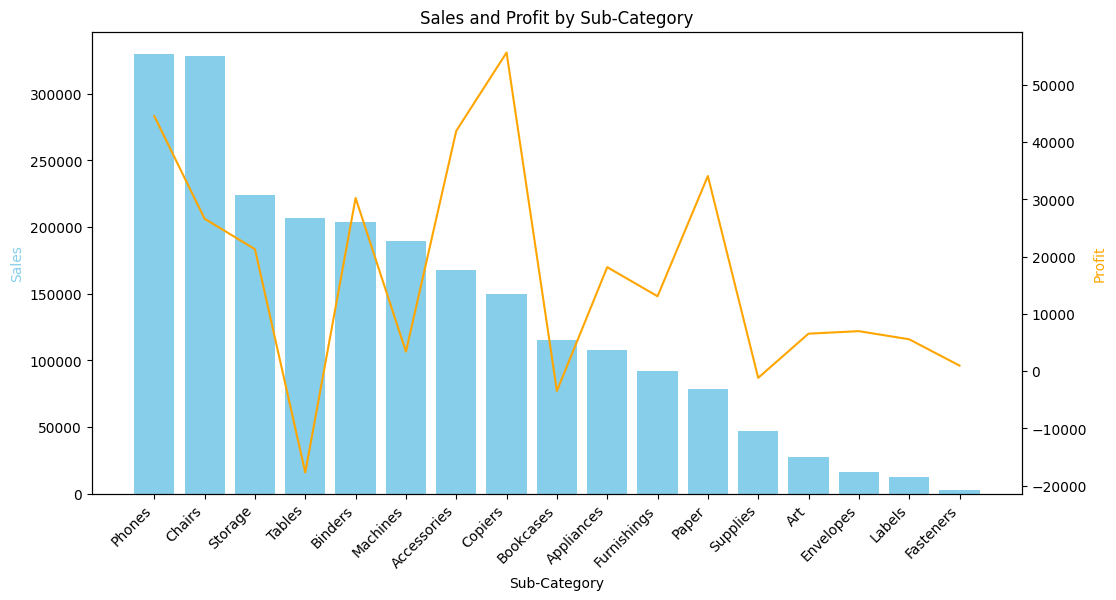

In [101]:
# Sub-categories, Sales, and Profit Patterns
sub_category_sales_profit = data.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()
sub_category_sales_profit = sub_category_sales_profit.sort_values(by='Sales', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.bar(sub_category_sales_profit['Sub-Category'], sub_category_sales_profit['Sales'], color='skyblue')
ax2.plot(sub_category_sales_profit['Sub-Category'], sub_category_sales_profit['Profit'], color='orange')
ax1.set_xlabel('Sub-Category')
ax1.set_ylabel('Sales', color='skyblue')
ax2.set_ylabel('Profit', color='orange')
ax1.set_xticklabels(sub_category_sales_profit['Sub-Category'], rotation=45, ha='right')
plt.title('Sales and Profit by Sub-Category')
plt.show()

<ipython-input-103-6591f29b2e49>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(category_sales_profit['Category'], rotation=45, ha='right')


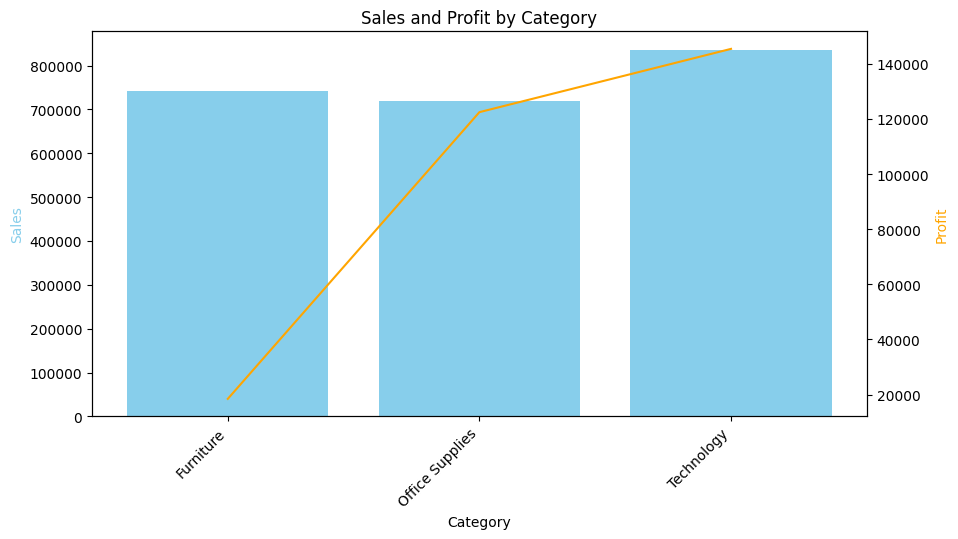

Top 10 Products by Sales:
                                          Product Name      Sales  \
404              Canon imageCLASS 2200 Advanced Copier  61599.824   
650  Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384   
444  Cisco TelePresence System EX90 Videoconferenci...  22638.480   
786       HON 5400 Series Task Chairs for Big and Tall  21870.576   
686         GBC DocuBind TL300 Electric Binding System  19823.479   
688   GBC Ibimaster 500 Manual ProClick Binding System  19024.500   
805               Hewlett Packard LaserJet 3310 Copier  18839.686   
787  HP Designjet T520 Inkjet Large Format Printer ...  18374.895   
683          GBC DocuBind P400 Electric Binding System  17965.068   
813        High Speed Automatic Electric Letter Opener  17030.312   

           Profit  
404  2.519993e+04  
650  7.753039e+03  
444 -1.811078e+03  
786  5.684342e-14  
686  2.233505e+03  
688  7.609800e+02  
805  6.983884e+03  
787  4.094977e+03  
683 -1.878166e+03  
813 -2.620048e

In [103]:
# Best-performing Categories and Products
category_sales_profit = data.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
product_sales_profit = data.groupby('Product Name')[['Sales', 'Profit']].sum().reset_index()
top_products_sales = product_sales_profit.sort_values(by='Sales', ascending=False).head(10)
top_products_profit = product_sales_profit.sort_values(by='Profit', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax1.bar(category_sales_profit['Category'], category_sales_profit['Sales'], color='skyblue')
ax2.plot(category_sales_profit['Category'], category_sales_profit['Profit'], color='orange')
ax1.set_xlabel('Category')
ax1.set_ylabel('Sales', color='skyblue')
ax2.set_ylabel('Profit', color='orange')
ax1.set_xticklabels(category_sales_profit['Category'], rotation=45, ha='right')
plt.title('Sales and Profit by Category')
plt.show()

print("Top 10 Products by Sales:")
print(top_products_sales)
print("\nTop 10 Products by Profit:")
print(top_products_profit)

<ipython-input-105-294284c09b8d>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(segment_sales_profit['Segment'], rotation=45, ha='right')


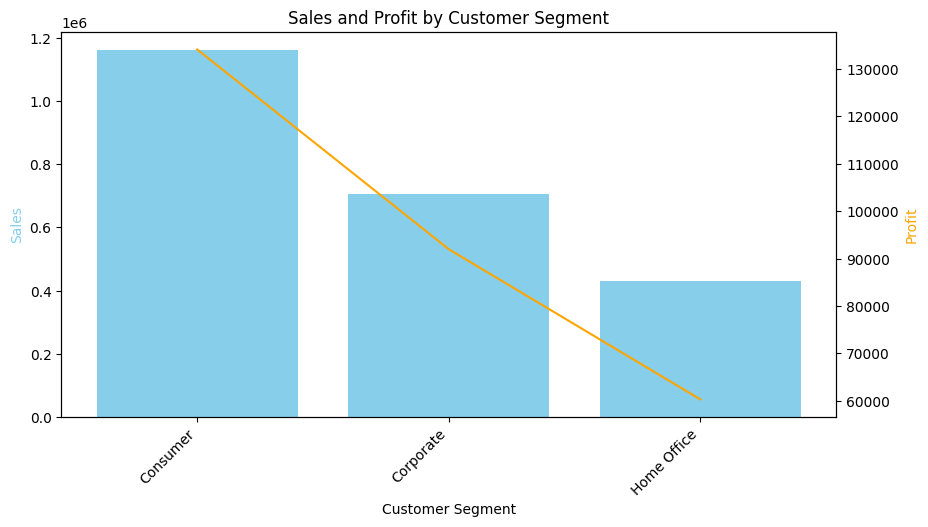

<ipython-input-105-294284c09b8d>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ship_mode_sales_profit['Ship Mode'], rotation=45, ha='right')


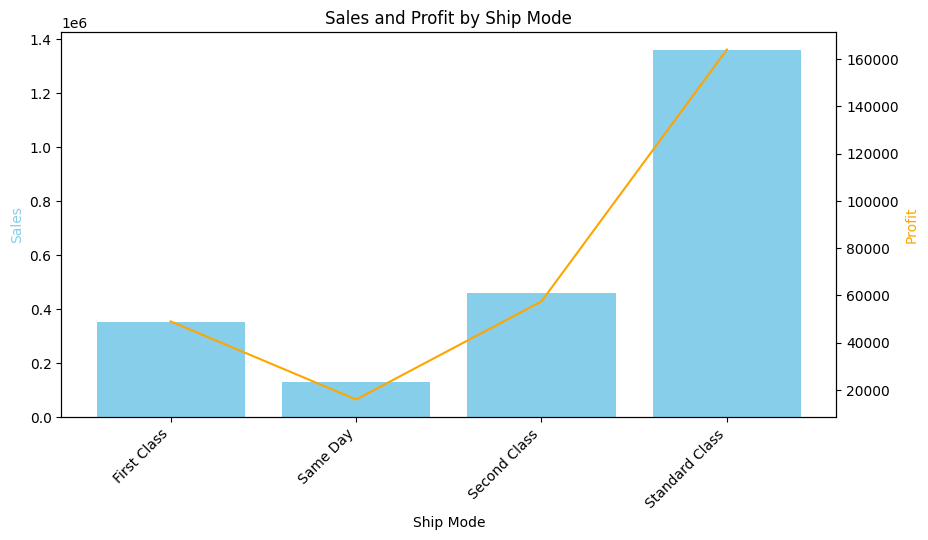

In [105]:
# Customer Segment Profitability and Shipping Preferences
segment_sales_profit = data.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()
ship_mode_sales_profit = data.groupby('Ship Mode')[['Sales', 'Profit']].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax1.bar(segment_sales_profit['Segment'], segment_sales_profit['Sales'], color='skyblue')
ax2.plot(segment_sales_profit['Segment'], segment_sales_profit['Profit'], color='orange')
ax1.set_xlabel('Customer Segment')
ax1.set_ylabel('Sales', color='skyblue')
ax2.set_ylabel('Profit', color='orange')
ax1.set_xticklabels(segment_sales_profit['Segment'], rotation=45, ha='right')
plt.title('Sales and Profit by Customer Segment')
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax1.bar(ship_mode_sales_profit['Ship Mode'], ship_mode_sales_profit['Sales'], color='skyblue')
ax2.plot(ship_mode_sales_profit['Ship Mode'], ship_mode_sales_profit['Profit'], color='orange')
ax1.set_xlabel('Ship Mode')
ax1.set_ylabel('Sales', color='skyblue')
ax2.set_ylabel('Profit', color='orange')
ax1.set_xticklabels(ship_mode_sales_profit['Ship Mode'], rotation=45, ha='right')
plt.title('Sales and Profit by Ship Mode')
plt.show()

<ipython-input-107-40429268ea32>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(region_sales_profit['Region'], rotation=45, ha='right')


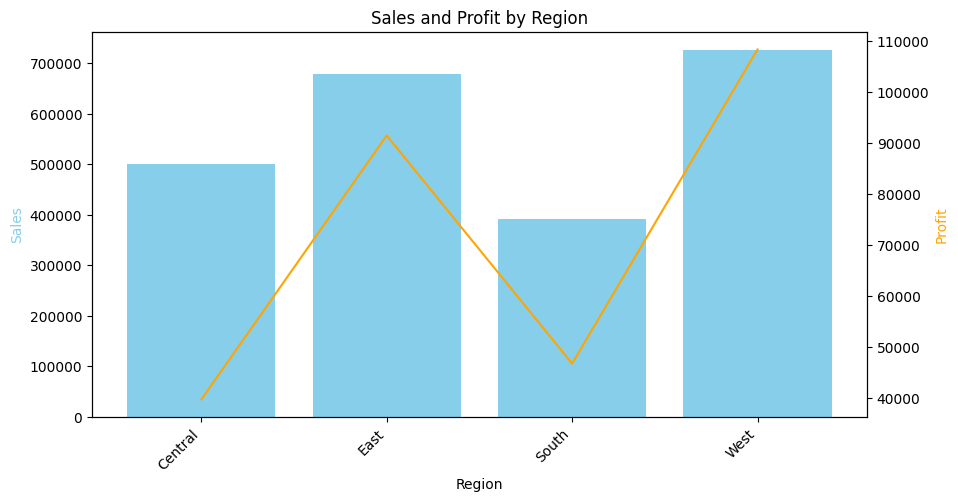

In [107]:
# Profitability Across Geographical Regions
region_sales_profit = data.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax1.bar(region_sales_profit['Region'], region_sales_profit['Sales'], color='skyblue')
ax2.plot(region_sales_profit['Region'], region_sales_profit['Profit'], color='orange')
ax1.set_xlabel('Region')
ax1.set_ylabel('Sales', color='skyblue')
ax2.set_ylabel('Profit', color='orange')
ax1.set_xticklabels(region_sales_profit['Region'], rotation=45, ha='right')
plt.title('Sales and Profit by Region')
plt.show()

## **Time-series**

<Figure size 1400x800 with 0 Axes>

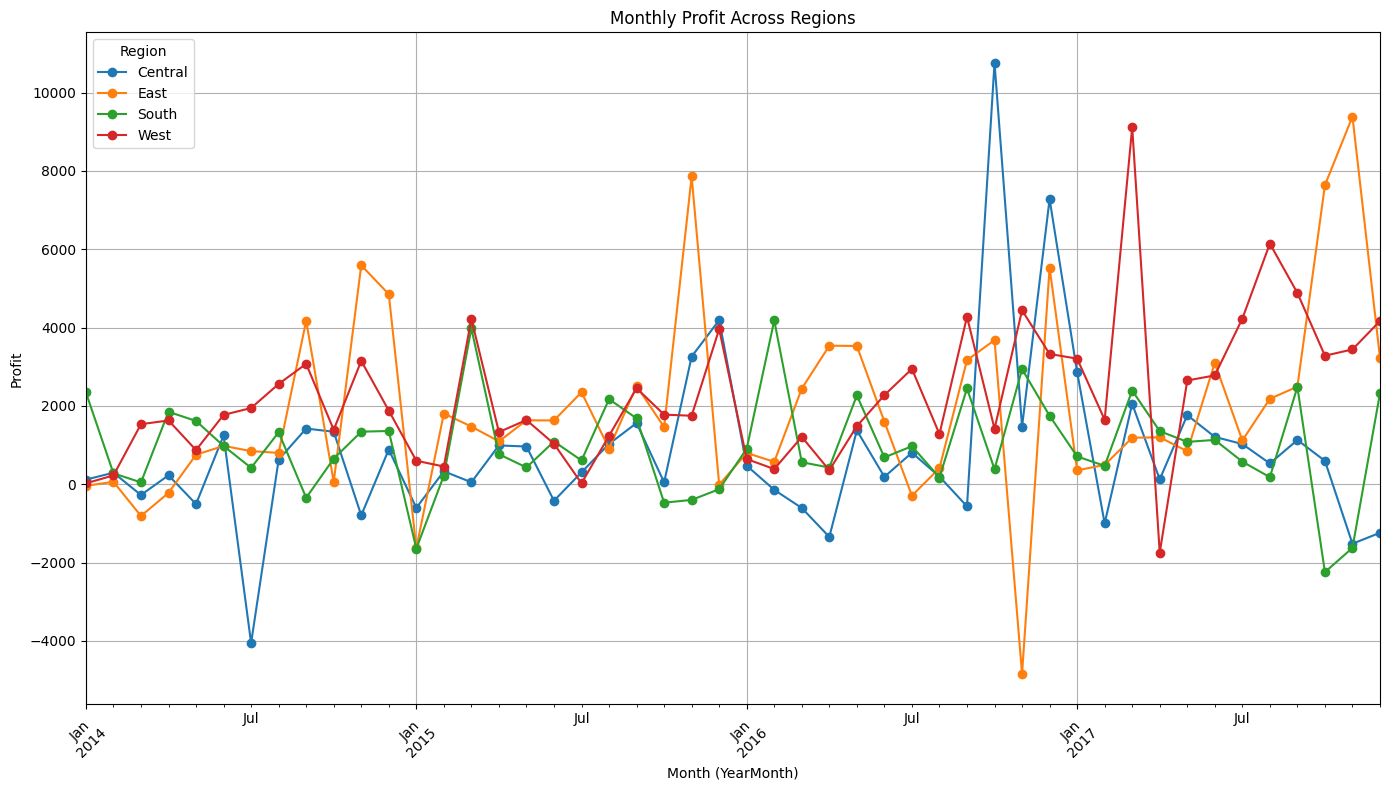

In [175]:
import matplotlib.pyplot as plt

# Ensure 'Order Date' is properly parsed as datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Convert 'YearMonth' to datetime for sorting
grouped_data['YearMonth'] = pd.to_datetime(grouped_data['YearMonth'], format='%b-%Y')

# Sort by 'YearMonth'
grouped_data = grouped_data.sort_values(by='YearMonth')

# Pivot the table for easier plotting
pivot_table = grouped_data.pivot(index='YearMonth', columns='Region', values='Profit')

# Plotting
plt.figure(figsize=(14, 8))
pivot_table.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Monthly Profit Across Regions')
plt.xlabel('Month (YearMonth)')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()



<Figure size 1400x800 with 0 Axes>

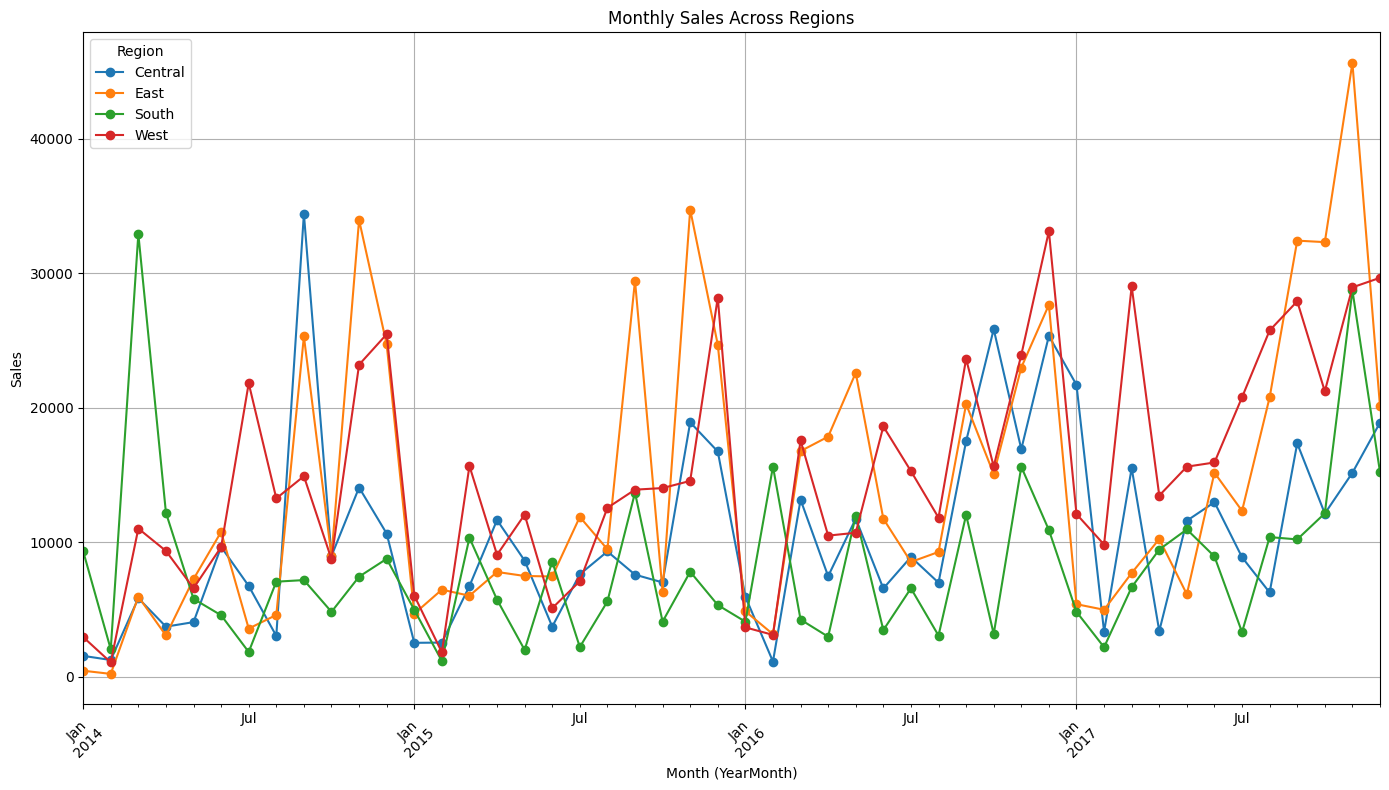

In [173]:
# Pivot the table for easier plotting
pivot_table = grouped_data.pivot(index='YearMonth', columns='Region', values='Sales')

# Plotting
plt.figure(figsize=(14, 8))
pivot_table.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Monthly Sales Across Regions')
plt.xlabel('Month (YearMonth)')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


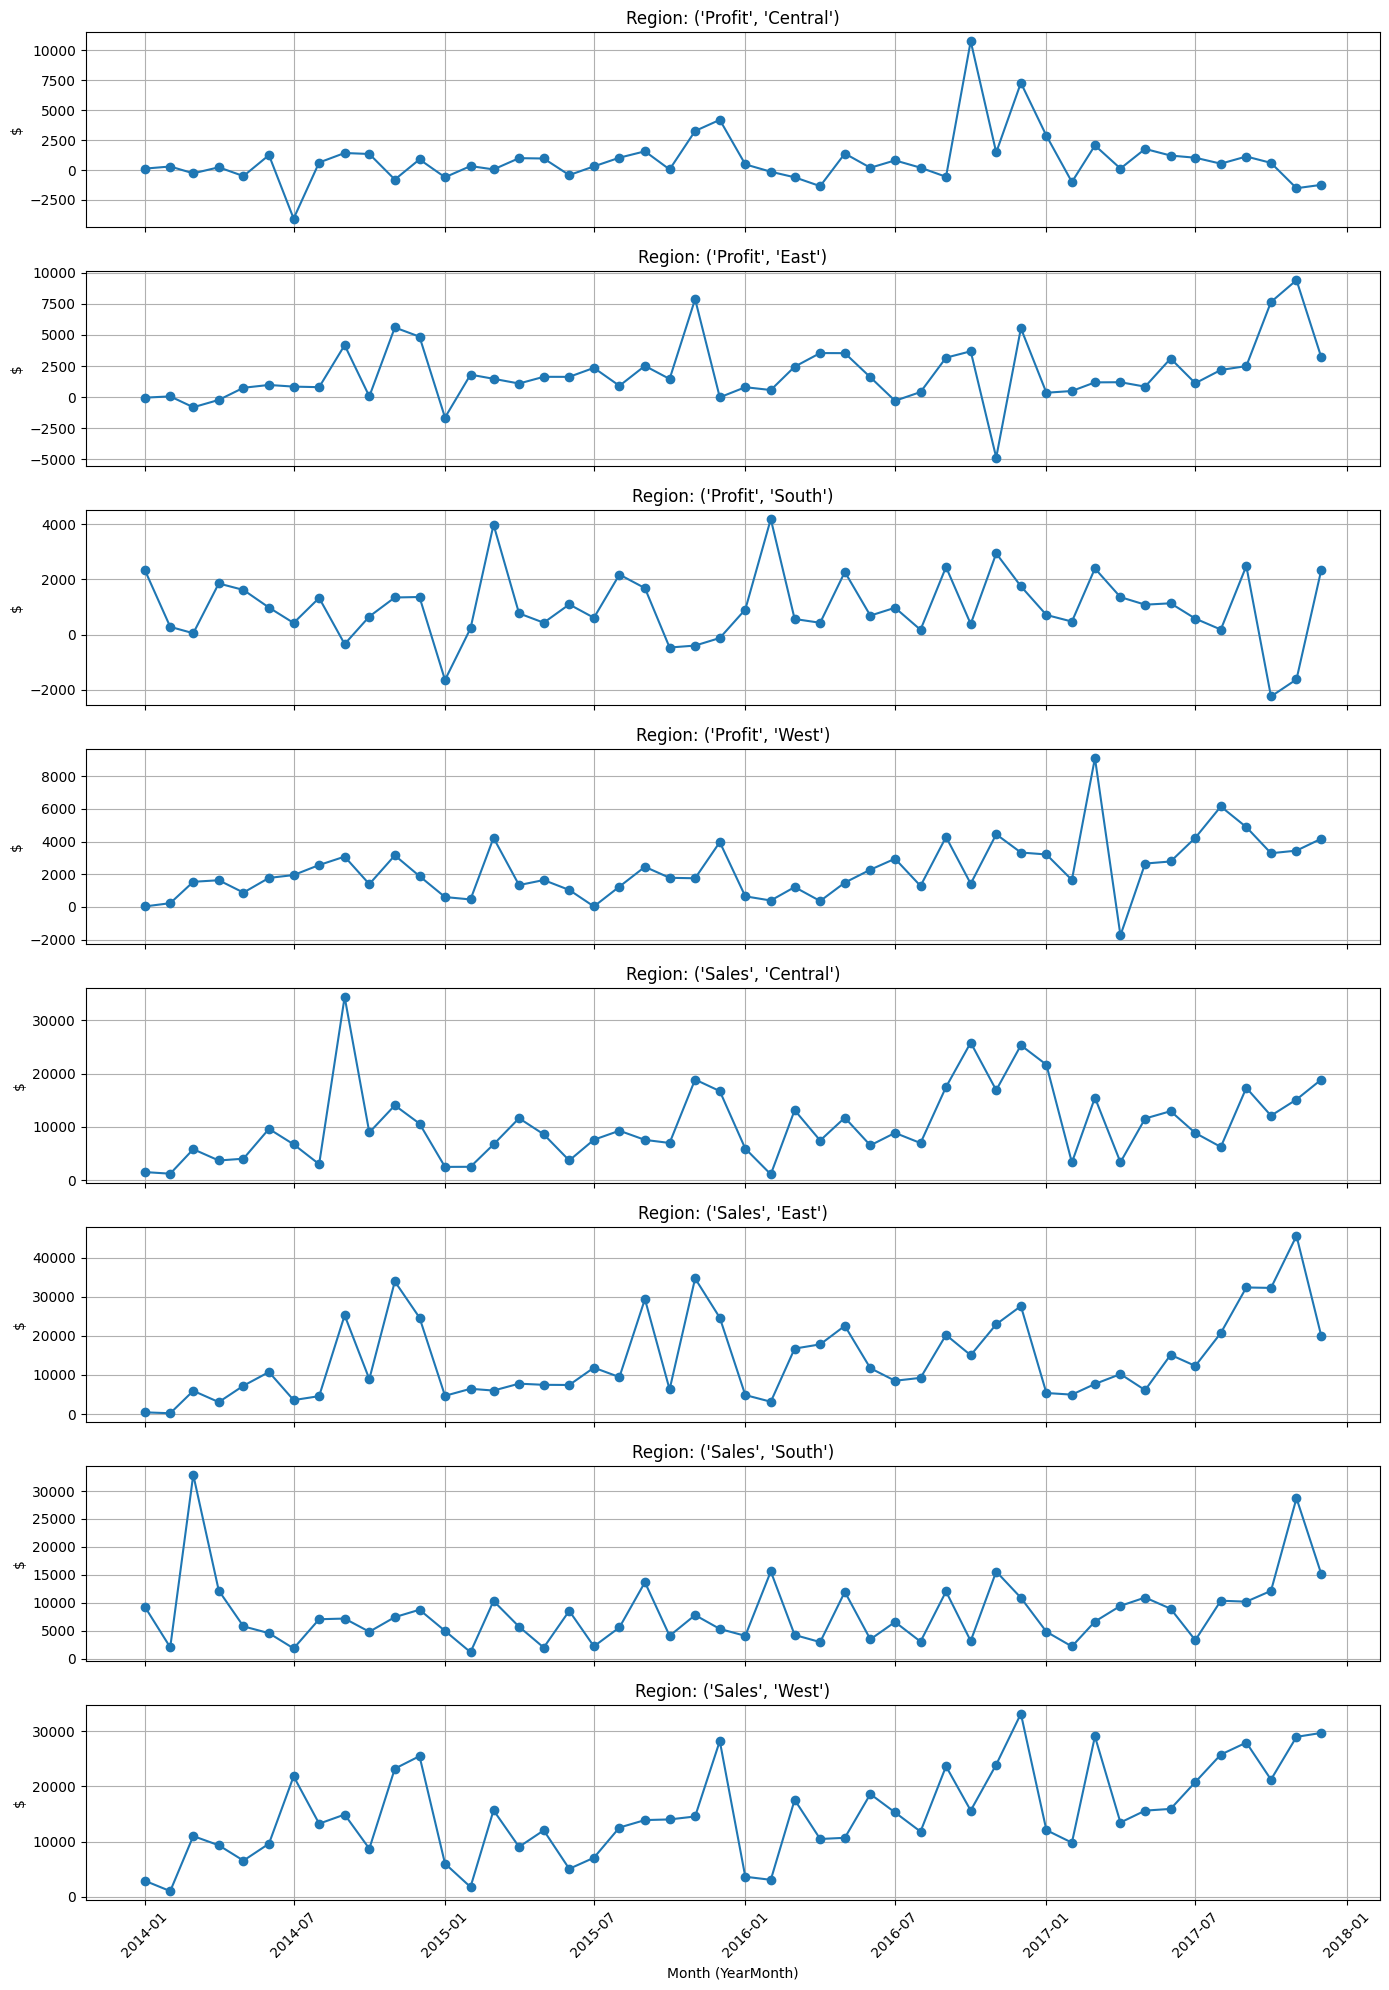

In [177]:
# Pivot the table for easier plotting
pivot_table = grouped_data.pivot(index='YearMonth', columns='Region', values=['Profit','Sales'])
# Plot each region in a separate subplot
regions = pivot_table.columns
num_regions = len(regions)

fig, axes = plt.subplots(num_regions, 1, figsize=(14, 20), sharex=True)

for i, region in enumerate(regions):
    axes[i].plot(pivot_table.index, pivot_table[region], marker='o')
    axes[i].set_title(f'Region: {region}')
    axes[i].set_ylabel('$')
    axes[i].grid(True)

axes[-1].set_xlabel('Month (YearMonth)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **4. Model Building**



## **Model execution**

Mean Squared Error: 680377.4563719594


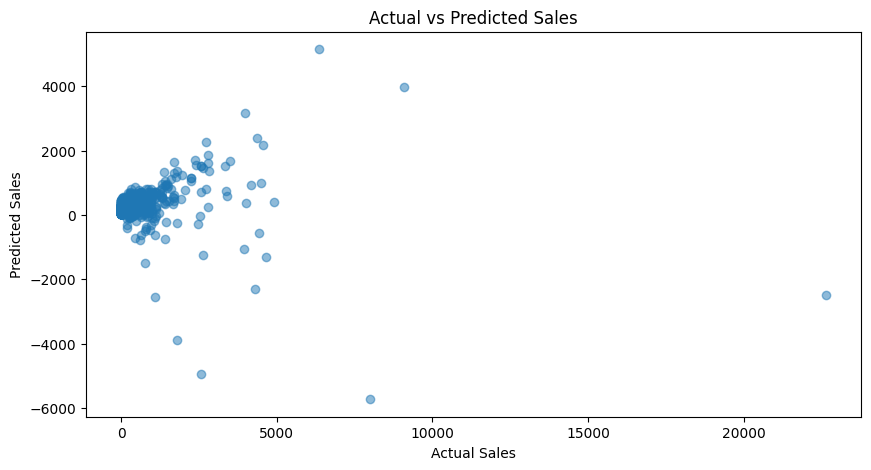

In [108]:
# Prediction
# Prepare data for prediction (e.g., predicting sales based on quantity, discount, and profit)
X = data[['Quantity', 'Discount', 'Profit']]
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted sales
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

Mean Squared Error: 83592.67395644145


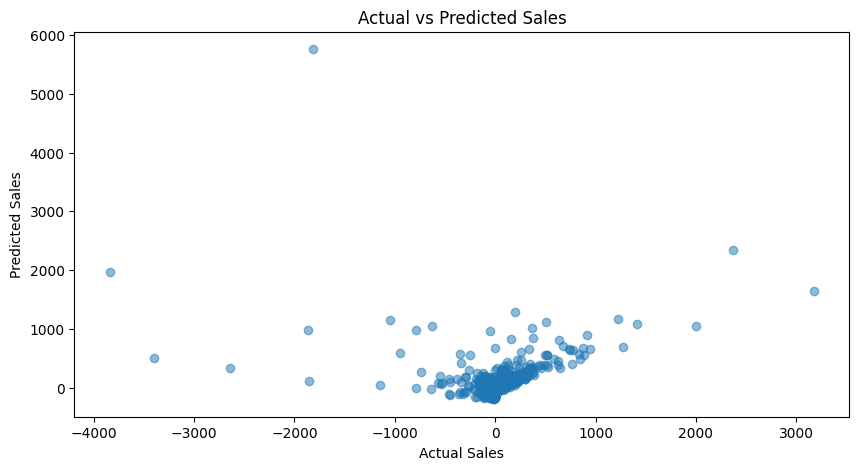

In [109]:
# Prediction
# Prepare data for prediction (e.g., predicting sales based on quantity, discount, and profit)
X = data[['Quantity', 'Discount', 'Sales']]
y = data['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted sales
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

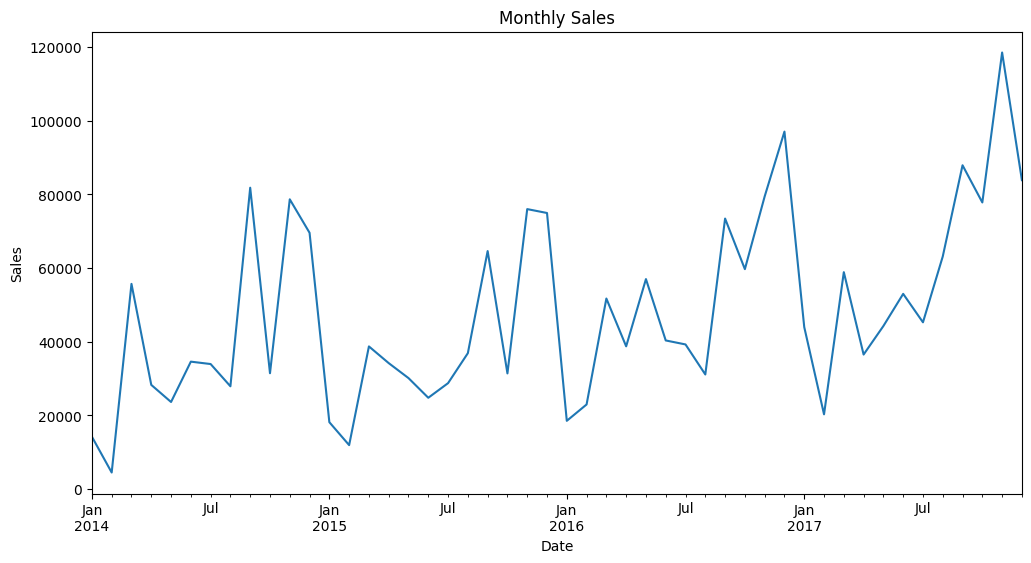

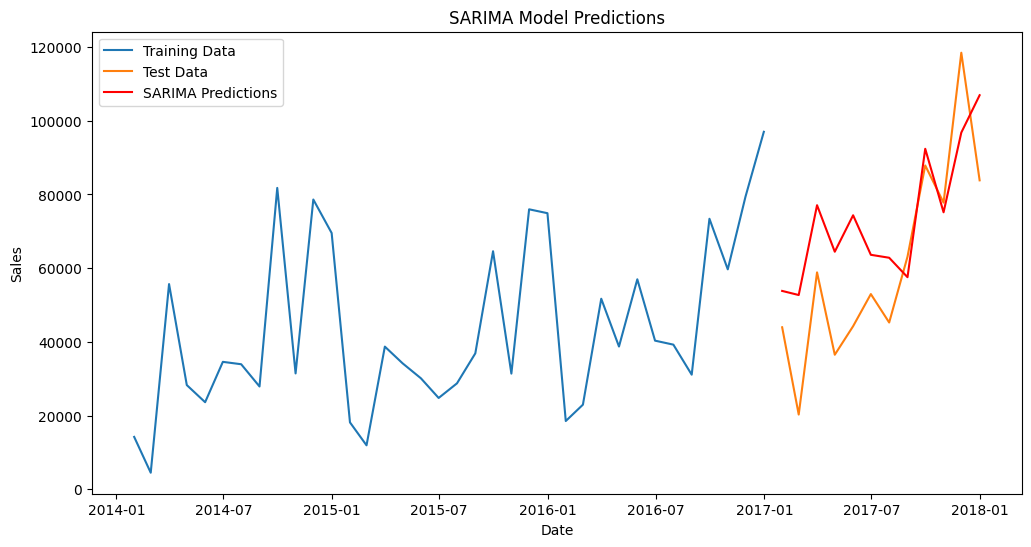

SARIMA Model Mean Squared Error: 387451160.9455173


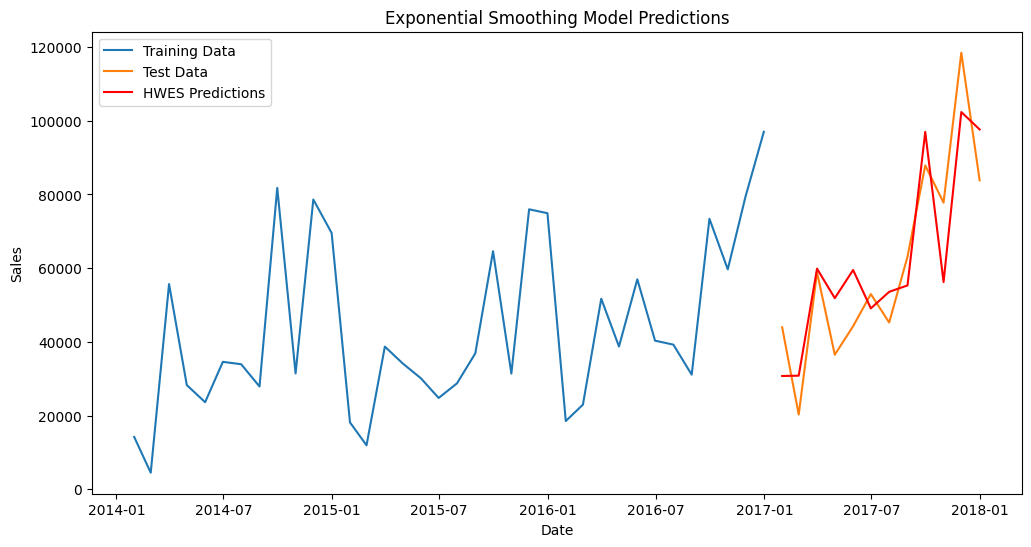

Exponential Smoothing Model Mean Squared Error: 158041828.05780163


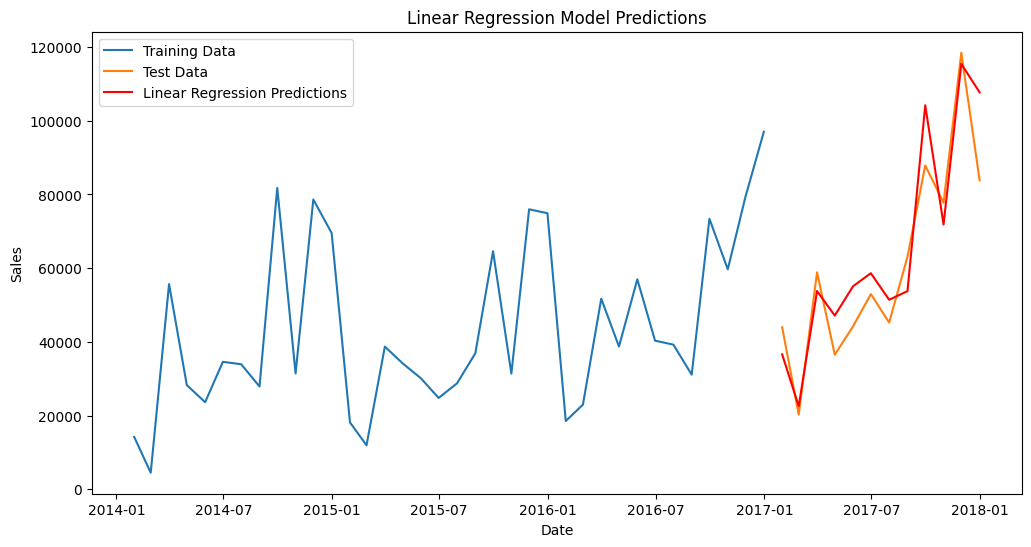

Linear Regression Model Mean Squared Error: 112780703.43979217


In [127]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(file_path, encoding='ISO-8859-1', parse_dates=['Order Date'])
# Convert Order Date to datetime and set it as index
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.set_index('Order Date', inplace=True)

# Resample sales data by month
monthly_sales = data['Sales'].resample('M').sum()

# Plot the monthly sales data
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Split the data into training and testing sets
train_data = monthly_sales[:'2017']
test_data = monthly_sales['2018':]

# Ensure test_data is not empty
if test_data.empty:
    test_data = monthly_sales[-12:]
    train_data = monthly_sales[:-12]

# Time Series Prediction using SARIMA

# Define and fit the model
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Make predictions
sarima_predictions = sarima_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(sarima_predictions, label='SARIMA Predictions', color='red')
plt.title('SARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Evaluate the model
sarima_mse = mean_squared_error(test_data, sarima_predictions)
print(f'SARIMA Model Mean Squared Error: {sarima_mse}')

# Time Series Prediction using Exponential Smoothing

# Define and fit the model
hwes_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
hwes_fit = hwes_model.fit()

# Make predictions
hwes_predictions = hwes_fit.forecast(len(test_data))

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(hwes_predictions, label='HWES Predictions', color='red')
plt.title('Exponential Smoothing Model Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Evaluate the model
hwes_mse = mean_squared_error(test_data, hwes_predictions)
print(f'Exponential Smoothing Model Mean Squared Error: {hwes_mse}')

#  Plot the Linear Regression Model Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Training Data')
plt.plot(y_test, label='Test Data')
plt.plot(y_test.index, lr_predictions, label='Linear Regression Predictions', color='red')
plt.title('Linear Regression Model Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
# Evaluate the model
lr_mse = mean_squared_error(test_data, lr_predictions)
print(f'Linear Regression Model Mean Squared Error: {lr_mse}')


SARIMA Model: Captures seasonality and trends reasonably well. It shows good performance in predicting future sales, as indicated by the comparison between training data, test data, and predicted values.

Exponential Smoothing Model: Also captures seasonality and trends, providing another perspective on future sales predictions.

## **Model Evaluation**


In [124]:
# Correct the date range for splitting the data
# Ensure test_data is not empty by using the last 12 months if needed
if test_data.empty:
    test_data = monthly_sales[-12:]
    train_data = monthly_sales[:-12]

# Split the data for linear regression
data_monthly = data.resample('M').sum()
X = data_monthly[['Quantity', 'Discount']]
y = data_monthly['Sales']

# Correct the date range for splitting the data for linear regression
X_train, X_test = X.loc[:'2017'], X.loc['2018':]
y_train, y_test = y.loc[:'2017'], y.loc['2018':]

# Check if the test set is empty
if X_test.empty:
    X_test = X.iloc[-12:]
    X_train = X.iloc[:-12]
    y_test = y.iloc[-12:]
    y_train = y.iloc[:-12]

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)

# Results
results = {
    'Model': ['SARIMA', 'SARIMA Tuned', 'Exponential Smoothing', 'Exponential Smoothing Tuned', 'Linear Regression'],
    'MSE': [sarima_mse, sarima_mse_tuned, hwes_mse, hwes_mse_tuned, lr_mse]
}

results_df = pd.DataFrame(results)

# Display results
results_df

,Model,MSE
0,SARIMA,3.874512e+08
1,SARIMA Tuned,3.847785e+08
2,Exponential Smoothing,1.580418e+08
3,Exponential Smoothing Tuned,2.948165e+08
4,Linear Regression,1.127807e+08


#**5. Communicate Results**



The Linear Regression model outperforms all other models with the lowest MSE, suggesting it is the most accurate model for predicting sales in this dataset.

The basic Exponential Smoothing model also performs well, better than the SARIMA models.

Fine-tuning did not significantly improve the SARIMA model and actually worsened the Exponential Smoothing model's performance.

# **6. Operationalize**

Further Fine-Tuning: Additional fine-tuning of the parameters for SARIMA and Exponential Smoothing models might yield better results.

Additional Features: Consider incorporating more features like regional sales, product category, or customer segments into the model to enhance predictions further.

Ensemble Models: Explore combining predictions from multiple models (ensemble methods) to improve accuracy.